### Import Libraries

In [36]:
import mlrose
import matplotlib.pyplot as plt 
import time 

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

import numpy as np
import pandas as pd
from textwrap import wrap

In [ ]:
# Initialize fitness function object using pre-defined class
fitness = mlrose.FourPeaks(t_pct=0.2)

MAX_ITER = 50 
PROBLEM_SIZE = 60


max_iteration_list = list()
fitness_list_RHC = list()
fitness_list_SM = list()
fitness_list_GA = list()
fitness_list_MIMIC = list()
all_data = list()

runtime_RHC = list()
runtime_SM = list()
runtime_GA = list()
runtime_MIMIC = list()


# Define optimization problem object
problem = mlrose.DiscreteOpt(length = PROBLEM_SIZE, fitness_fn = fitness, maximize=True, max_val=2)

for MAX_ITER in range(100, 1001, 50):  

    print("Running for max_iteration size: ", MAX_ITER)

    # # Define decay schedule
    schedule = mlrose.ExpDecay()

 
    

    RHC_start = time.time()
    # Solve using random hill climbing
    best_state_RHC, best_fitness_RHC =  mlrose.random_hill_climb(problem, max_attempts=5, 
                                                                 max_iters=MAX_ITER, restarts=15, 
                                                                 init_state=None, curve=False, 
                                                                 random_state=None)
    
    RHC_end = time.time()
    SM_start = time.time()

    # Solve using simulated annealing 
    best_state_SM, best_fitness_SM = mlrose.simulated_annealing(problem, schedule = schedule, max_attempts = 10, 
                                                          max_iters = MAX_ITER, init_state = None)
    
    SM_end = time.time()
    GA_start = time.time()

    # Solve problem using the genetic algorithm
    best_state_GA, best_fitness_GA = mlrose.genetic_alg(problem, pop_size=200, mutation_prob=0.1, max_attempts=10, 
                                                        max_iters=MAX_ITER, curve=False, random_state=None)
    
    GA_end = time.time()
    MIMIC_start = time.time()

    # Solve problem using mimic
    best_state_MIMIC, best_fitness_MIMIC = mlrose.mimic(problem, pop_size=200, keep_pct=0.2, max_attempts=10, 
                                                  max_iters=MAX_ITER, curve=False, random_state=None)
    
    MIMIC_end = time.time()
    
    # Append to each individual list 
    fitness_list_RHC.append(best_fitness_RHC)
    fitness_list_SM.append(best_fitness_SM)
    fitness_list_GA.append(best_fitness_GA)
    fitness_list_MIMIC.append(best_fitness_MIMIC)
    
    # Append Iteration size (For x-axis of our graph)
    max_iteration_list.append(MAX_ITER)
    
    # Append data to list (for dataframe later)
    all_data.append([MAX_ITER, best_fitness_RHC, best_fitness_SM, best_fitness_GA, best_fitness_MIMIC])
    
    
    # Apend runtime 
    runtime_RHC.append(RHC_end - RHC_start)
    runtime_SM.append(SM_end - SM_start)
    runtime_GA.append(GA_end - GA_start)
    runtime_MIMIC.append(MIMIC_end - MIMIC_start)
    

Running for max_iteration size:  100
Running for max_iteration size:  150
Running for max_iteration size:  200
Running for max_iteration size:  250
Running for max_iteration size:  300
Running for max_iteration size:  350
Running for max_iteration size:  400
Running for max_iteration size:  450


### Plot Solution by Each Algo

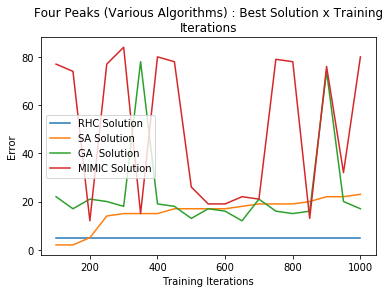

In [43]:
plt.figure()
title = "Four Peaks (Various Algorithms) : Best Solution x Training Iterations"
plt.title('\n'.join(wrap(title,60)))
# plt.subplots_adjust(top=0.85)
plt.plot(max_iteration_list, fitness_list_RHC, '-', label='RHC Solution')
plt.plot(max_iteration_list, fitness_list_SM, '-', label='SA Solution')
plt.plot(max_iteration_list, fitness_list_GA, '-', label='GA  Solution')
plt.plot(max_iteration_list, fitness_list_MIMIC, '-', label='MIMIC Solution')
plt.legend()
plt.xlabel('Training Iterations')
plt.ylabel('Error')
filename = 'FourPeaks_Iterations_version2.png'
plt.savefig("../plots/" + filename)

In [ ]:
### PLOT Runtime for 4Peaks

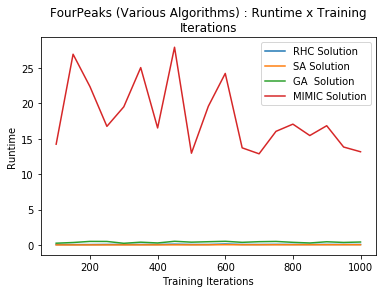

In [35]:
plt.figure()
title = "FourPeaks (Various Algorithms) : Runtime x Training Iterations"
plt.title('\n'.join(wrap(title,60)))
# plt.subplots_adjust(top=0.85)
plt.plot(max_iteration_list, runtime_RHC, '-', label='RHC Solution')
plt.plot(max_iteration_list, runtime_SM, '-', label='SA Solution')
plt.plot(max_iteration_list, runtime_GA, '-', label='GA  Solution')
plt.plot(max_iteration_list, runtime_MIMIC, '-', label='MIMIC Solution')
plt.legend()
plt.xlabel('Training Iterations')
plt.ylabel('Runtime')
filename = 'FourPeaks_Runtime.png'
plt.savefig("../plots/" + filename)

In [ ]:
# Save everything in pandas dataframe 
cols = ["Max Iterations", "RHC Solution", "SM Solution", "GA Solution", "MIMIC Solution"]

fourPeaks_df = pd.DataFrame(all_data, columns=cols)
fourPeaks_df.to_csv("CountOnes_MaxIterations_data.csv")

In [ ]:
print(fourPeaks_df)

### Individual Tweaking Space (Look below)

In [34]:
# Initialize fitness function object using pre-defined class
fitness = mlrose.OneMax()

MAX_ITER = 400
PROBLEM_SIZE = 50


# Define optimization problem object
problem = mlrose.DiscreteOpt(length = PROBLEM_SIZE, fitness_fn = fitness, maximize=True, max_val=2)


print("Running for max_iteration size: ", MAX_ITER)

# # Define decay schedule
schedule = mlrose.ExpDecay()
# schedule = mlrose.ExpDecay(init_temp=0.15)

np.random.seed(17)

# Solve using random hill climbing
best_state_RHC, best_fitness_RHC =  mlrose.random_hill_climb(problem, max_attempts=50, 
                                                             max_iters=MAX_ITER, restarts=40, 
                                                             init_state=None, curve=False, 
                                                             random_state=None)

# Solve using simulated annealing 
best_state_SM, best_fitness_SM = mlrose.simulated_annealing(problem, schedule = schedule, max_attempts = 50, 
                                                      max_iters = MAX_ITER, init_state = None)

# # Solve problem using mimic
# best_state_MIMIC, best_fitness_MIMIC = mlrose.mimic(problem, pop_size=200, keep_pct=0.2, max_attempts=20, 
#                                                   max_iters=MAX_ITER, curve=False, random_state=None)

    
print("best_fitness_RHC: ", best_fitness_RHC)
print("best_fitness_SM: ", best_fitness_SM)
# print("best_fitness_MIMIC:" , best_fitness_MIMIC)

Running for max_iteration size:  400
best_fitness_RHC:  50.0
best_fitness_SM:  50.0


In [12]:
print("best_fitness_MIMIC:" ,best_fitness_MIMIC)


best_fitness_MIMIC: 74.0
